## Splitting the testing and training data

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
df = pd.read_csv('Airbnb_data/Boston_data.csv')
df["is_business_travel_ready"] = df['is_business_travel_ready'].replace('f','0')
df["is_business_travel_ready"] = df['is_business_travel_ready'].replace('t','1')

train , test = train_test_split(df, test_size = 0.3)
x_train = train.drop('price', axis=1)

x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test.drop('price', axis = 1)
y_test = test['price']
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,61268,61269,61270,61271,61272,61273,61274,61275,61276,61277
price,125,145,169,65,99,154,100,225,229,209,...,45,75,80,110,250,125,75,80,60,66
accommodates,2,2,4,2,2,2,1,4,2,2,...,2,4,2,3,4,6,2,4,2,3
bathrooms,1,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
bedrooms,1,1,1,1,1,1,1,2,1,1,...,1,1,1,0,1,1,1,1,1,1
beds,1,1,2,1,1,1,1,2,1,1,...,1,2,2,2,1,3,1,2,1,1
guests_included,2,1,2,1,1,1,1,4,1,1,...,1,1,1,1,1,1,1,2,1,1
extra_people,0,0,8,20,0,0,0,20,0,0,...,0,0,0,0,0,0,0,50,25,10
minimum_nights,30,3,3,3,14,20,14,3,2,2,...,1,2,1,1,3,3,1,2,1,1
maximum_nights,1125,730,730,60,365,365,365,365,120,365,...,1125,1125,1125,1125,7,1125,7,1125,1125,1125
guests_included.1,2,1,2,1,1,1,1,4,1,1,...,1,1,1,1,1,1,1,2,1,1


## Preprocessing – Scaling the features

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
X_test = pd.DataFrame(x_test_scaled)

/anaconda2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype bool, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Error rate for different k values



In [13]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


rmse_val = [] #to store rmse values for different k
for K in range(8):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

 


In [18]:
#plotting the rmse values against k values
#curve = pd.DataFrame(rmse_val) #elbow curve 
#curve.plot()


Since we are getting best rmse value for k =2

In [15]:
from sklearn.externals import joblib
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

filename = 'finalized_model.sav'
joblib.dump(model, filename)

['finalized_model.sav']

In [16]:
from sklearn.metrics import mean_absolute_error 

mae_val = [] #to store rmse values for different k
acc_val = []
rmse_val = [] #to store rmse values for different k
for K in range(21):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_absolute_error(y_test,pred)) #calculate mae
    mae_val.append(error) #store mae values
    accuracy=model.score(X_test, y_test)
    acc_val.append(accuracy)
    error1 = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error1) #store rmse values
    
    print('MAE value for k= ' , K , 'is:', error,'RMSE value is:', error1,'and accuracy is:',accuracy)
    


MAE value for k=  1 is: 4.586639364659569 RMSE value is: 206.29787455025138 and accuracy is: 0.41322138164780386
MAE value for k=  2 is: 4.944535713326938 RMSE value is: 187.39892728382395 and accuracy is: 0.5158064785845253
MAE value for k=  3 is: 5.198086962045176 RMSE value is: 182.49142903109038 and accuracy is: 0.5408340054022425
MAE value for k=  4 is: 5.431900984266195 RMSE value is: 176.76694226962124 and accuracy is: 0.5691889122682658
MAE value for k=  5 is: 5.693096417884087 RMSE value is: 180.4076752242225 and accuracy is: 0.5512599899181868
MAE value for k=  6 is: 6.037452012721773 RMSE value is: 186.70841453148554 and accuracy is: 0.519368140626624
MAE value for k=  7 is: 6.387469885680086 RMSE value is: 189.75364568309553 and accuracy is: 0.5035619850772641
MAE value for k=  8 is: 6.684019585537085 RMSE value is: 189.11221384147456 and accuracy is: 0.5069125710039648
MAE value for k=  9 is: 6.947758855126137 RMSE value is: 190.4645481248956 and accuracy is: 0.49983525727

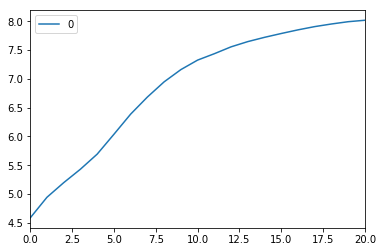

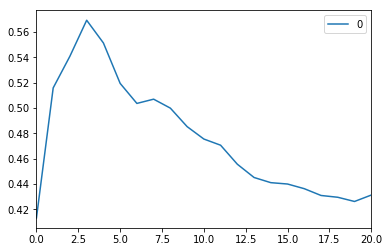

In [17]:
#plotting the mae values against k values
curve1 = pd.DataFrame(mae_val) #elbow curve 
curve1.plot()

#plotting the accuracy against k values
curve2 = pd.DataFrame(acc_val) #elbow curve 
curve2.plot()

## 10-fold cross validation

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score 

# perform 10-fold cross validation
for k in filter(lambda x: x % 2 != 0, myList):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [ ]:
import pickle
# Dump the trained decision tree classifier with Pickle
knn_pkl_filename = 'Airbnb_data/Models/knn_regressor.pkl'
# Open the file to save as pkl file
knn_model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(model, knn_model_pkl)
# Close the pickle instances
knn_model_pkl.close()


In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)

accuracy=model.score(X_test, y_test)
accuracy


In [ ]:
X_test

## Predictions on the test dataset



In [ ]:
#reading test and submission files
test = pd.read_csv('Airbnb_data/test.csv')

#preprocessing test dataset

test = pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)
    

#predicting on the test set and creating submission file
predict = model.predict(test)
submission['price'] = predict

submission['price'] = predict
submission.to_csv('Airbnb_data/submit_file.csv',index=False)


In [ ]:
##  Implementing GridsearchCV 

from sklearn import metrics

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


In [ ]:
# for testing the data
#Can be skipped
xdf=pd.DataFrame(X_train)
xdf.to_csv('Airbnb_data/trial/X_train.csv',index=False)

xdf=pd.DataFrame(X_test)
xdf.to_csv('Airbnb_data/trial/X_test.csv',index=False)

xdf=pd.DataFrame(y_train)
xdf.to_csv('Airbnb_data/trial/y_train.csv',index=False)

xdf=pd.DataFrame(y_test)
xdf.to_csv('Airbnb_data/trial/y_test.csv',index=False)


In [ ]:
xdf=pd.DataFrame(cluster_data)
xdf.to_csv('Airbnb_data/trial/cluster_data.csv',index=False)




In [ ]:
X=cluster_data
y=df.ix[:,'price']
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

X=cluster_data
y=df.ix[:,'price']
tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
#Fit Model
clf2.fit(X, y)

In [ ]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

In [ ]:
FeatImp.index[0:30]

In [ ]:
FeatImp['importance'].values[0:30]

In [ ]:
import matplotlib.pyplot as plt
plt.figure()

plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(17,10))
# df['price'] = df.price.str.replace("\$|,", "").astype(float)
# df['price'].hist()
sns.distplot(df['price'])
# plt.show()
mean_price = df.price.iloc[:5].mean()
mean_price
# df['host_acceptance_rate'].head()

In [ ]:
df['review_scores_rating'].fillna(0, inplace=True)
df['review_scores_rating'].dropna(axis=0, inplace=True)
sns.distplot(df['review_scores_rating'])


In [ ]:
#Correlation Plot
var = 'review_scores_rating'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price')
data.plot.scatter(x=var, y='price', ylim=(0,1500))

In [ ]:
#cluster by locations
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def plot_3D_clusters(X, k):
    """Plot 3 attributes in dataset to explore natural clusters within data"""
    estimators = {'k_means_3': KMeans(n_clusters=k)}
    fignum = 1
    for name, est in estimators.items():
        fig = plt.figure(fignum, figsize=(4, 3))
        plt.clf()
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        plt.cla()
        est.fit(X)
        labels = est.labels_
        # Change the 2nd column in X[:,_] to choose attributes for plotting
        ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float),edgecolor='k')
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel('latitude')
        ax.set_ylabel('longitude')
        ax.set_zlabel('price')
        fignum = fignum + 1
    plt.show()
# change the n
df = pd.read_csv('Airbnb_data/listings_Boston.csv')
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
X = np.array(df[['latitude', 'longitude', 'price']])
plot_3D_clusters(X, 4)

In [ ]:
# Transformation
# right skewed: log transform
# left skewed: power transform
df['accommodates']

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Create KNN model: 5 closest neighbors
knn = KNeighborsRegressor(algorithm='brute', n_neighbors = 5)
cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds']


In [ ]:
knn.fit(X_train[cols], y_train)


In [ ]:
features_predictions = knn.predict(norm_test_df[cols])
features_mse = mean_squared_error(norm_test_df['price'], features_predictions)
features_rmse = features_mse ** (1/2)